## Predicting Horse Colic Survival: A Machine Learning Approach for Early Intervention
### 6/7/23

X23 Group 15 Members:
- Andrew Kassis
- Christian Vargas
- Deniz Erisgen
- Tiffany Andersen

This data science project leverages historical medical records to effectively determine the survival probability of horses with colic by utilizing predictive models that evaluate the likelihood of their survival, taking into account past medical conditions.

In [173]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.animalclinicfortlupton.com/uploads/5/7/6/2/57623911/colicrxhorse-with-gi-diagram_orig.jpg")
# Animal Clinic, LLC "Colic Diagnosis" photo source  : https://www.animalclinicfortlupton.com/colic-diagnosis.html

Objective: To develop a predictive model capable of estimating the probability of survival for horses affected by colic. This project aims to provide valuable insights to veterinarians and horse owners, enabling them to make well-informed decisions regarding treatment options and care. Furthermore, the objective involves conducting an in-depth analysis to identify the most influential features or attributes for accurately predicting colic occurrences.

### Initial Exploration

In [174]:
import warnings
# Ignore the warning
warnings.filterwarnings("ignore")

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [176]:
# Load the dataset and test dataset from the provided link
# Training data
url = 'https://raw.githubusercontent.com/c-vargas/horse_colic_data/main/horse_colic.csv'
df = pd.read_csv(url)
# Testing data
url2 = 'https://raw.githubusercontent.com/c-vargas/horse_colic_data/main/horse_test_data.csv'
test = pd.read_csv(url2)

In [177]:
# Check the size of the dataset
data_size = df.shape
print("Data Size:", data_size)
test_size = test.shape
print("Test data Size:", test_size)

Data Size: (299, 28)
Test data Size: (89, 28)


In [178]:
print(df.head(10))

  surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate   
0      no  adult           530101         38.5   66.0              28.0  \
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   
5      no  adult           528355          NaN    NaN               NaN   
6     yes  adult           526802         37.9   48.0              16.0   
7     yes  adult           529607          NaN   60.0               NaN   
8      no  adult           530051          NaN   80.0              36.0   
9      no  young          5299629         38.3   90.0               NaN   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time   
0                cool          reduced             NaN            more_3_sec  \
1             

In [179]:
print(df.dtypes.value_counts())

object     17
float64     7
int64       4
Name: count, dtype: int64


In [180]:
# Get the types of each column
column_types = df.dtypes
print("Column Types:")
print(column_types)

Column Types:
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object


In [181]:
# Count the number of missing values in each column
na_count = df.isnull().sum()
print("NA Values:")
print(na_count)

NA Values:
surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


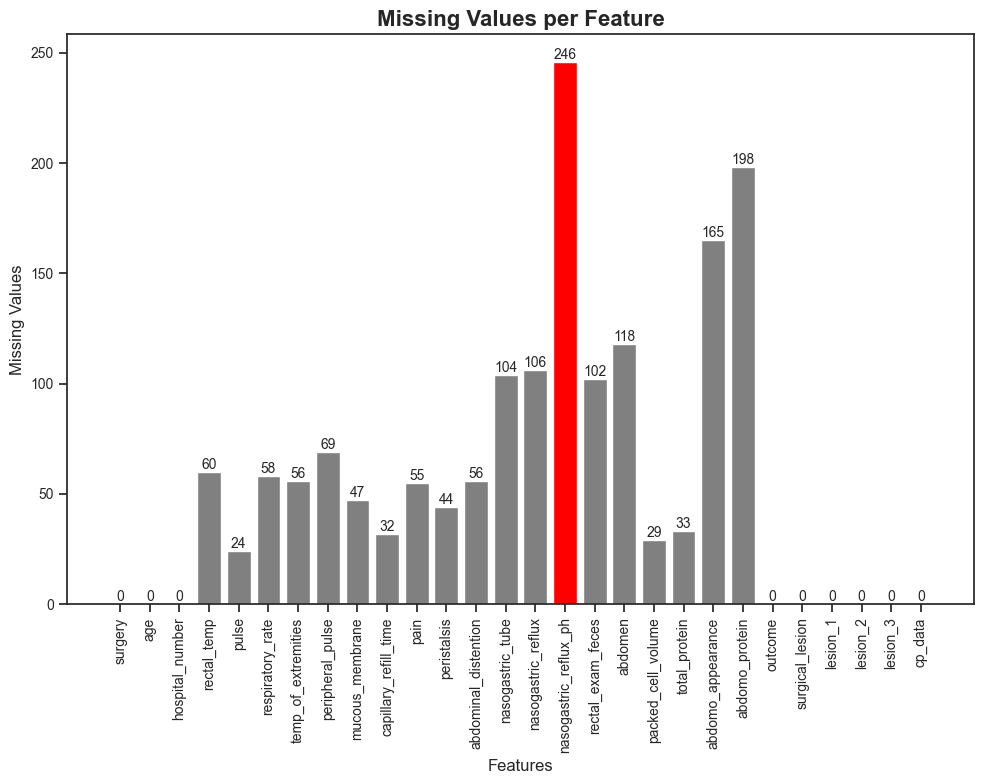

In [182]:
# Bar chart to illustrate missing values per feature
# This visualization is helpful to visualize the top features to potentially delete
plt.figure(figsize=(10, 8))
# Customize bar colors
colors = ['red' if value == max(na_count) else 'gray' for value in na_count]
plt.bar(range(len(na_count)), na_count, color=colors)
plt.title('Missing Values per Feature', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values', fontsize=12)
# Adjust the x-ticks properties
plt.xticks(np.arange(len(df.columns)), df.columns.values, rotation='vertical', fontsize=10)
# Adjust the y-ticks properties
plt.yticks(fontsize=10)
# Adding value labels to the bars
for i, value in enumerate(na_count):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

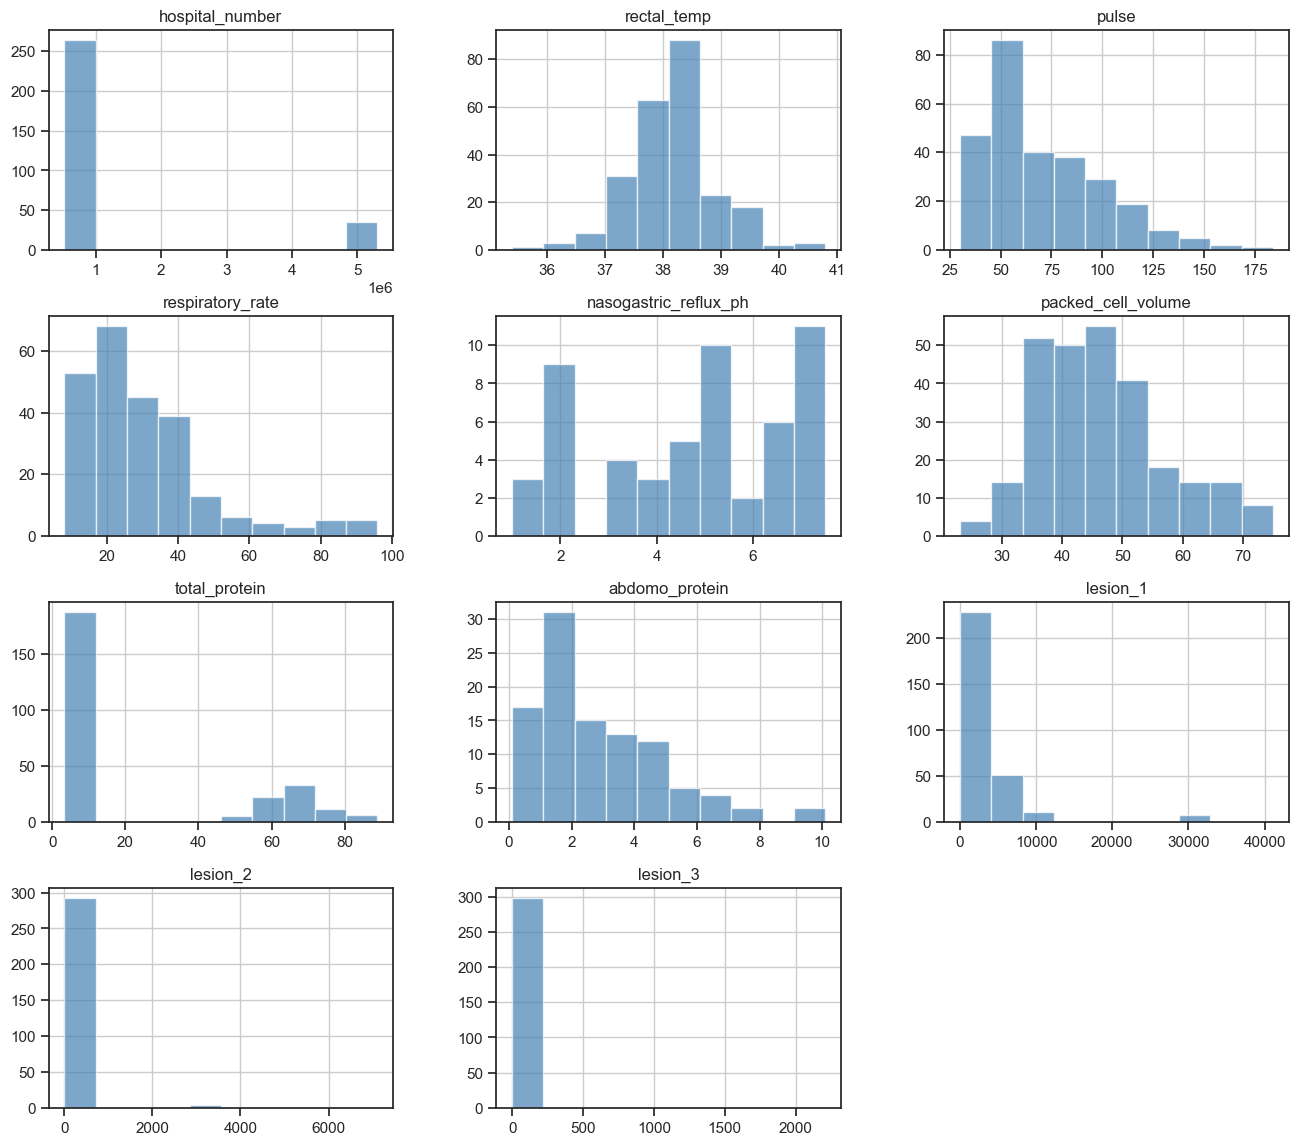

In [183]:
# Histogram representations of each column in the DataFrame
fig, ax = plt.subplots(figsize=(16, 14))
df.hist(ax=ax, color='steelblue', edgecolor='white', alpha=0.7)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [184]:
# Check the number of missing values (NA values)
missing_values = df.isna().sum().sum()
print("Number of missing values in the dataset:", missing_values)

Number of missing values in the dataset: 1602


In [185]:
# Check for obviously bad data (e.g., outliers, unrealistic values)
print(df.describe().to_string(float_format="{:.2f}".format))

       hospital_number  rectal_temp  pulse  respiratory_rate  nasogastric_reflux_ph  packed_cell_volume  total_protein  abdomo_protein  lesion_1  lesion_2  lesion_3
count           299.00       239.00 275.00            241.00                  53.00              270.00         266.00          101.00    299.00    299.00    299.00
mean        1087732.70        38.17  72.00             30.46                   4.71               46.31          24.27            3.04   3659.71     90.53      7.39
std         1532031.58         0.73  28.65             17.67                   1.98               10.44          27.36            1.97   5408.47    650.64    127.75
min          518476.00        35.40  30.00              8.00                   1.00               23.00           3.30            0.10      0.00      0.00      0.00
25%          528904.00        37.80  48.00             18.00                   3.00               38.00           6.50            2.00   2111.50      0.00      0.00
50%       

In [186]:
# Additional information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

### Initial preprocessing and cleaning

In [187]:
# Delete unecessary columns
df.drop(['hospital_number'], axis=1, inplace=True)

In [188]:
# Percentage of missing data by column:
missing_percentage = df.isnull().mean() * 100
print("Missing Percentage:")
print(missing_percentage)

Missing Percentage:
surgery                   0.000000
age                       0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
nasogastric_reflux_ph    82.274247
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
abdomo_appearance        55.183946
abdomo_protein           66.220736
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64


In [189]:
# Remove columns with lots of missing data (threshold at 60%)
threshold = 50
columns_to_drop = df.columns[missing_percentage > threshold]
df.drop(columns_to_drop, axis=1, inplace=True)

#### Feature Engineering

In [190]:
#### TO BE ADDED NEXT PHASE
# This feature combines lesion_1, lesion_2, and lesion_3 into a single feature.
# The formatting and numbering of these columns can be confusing, but they have
# the potential to be valuable as an overall health predictor.

### Exploration and Visualization

In [191]:
print(df.outcome.value_counts())

outcome
lived         178
died           77
euthanized     44
Name: count, dtype: int64


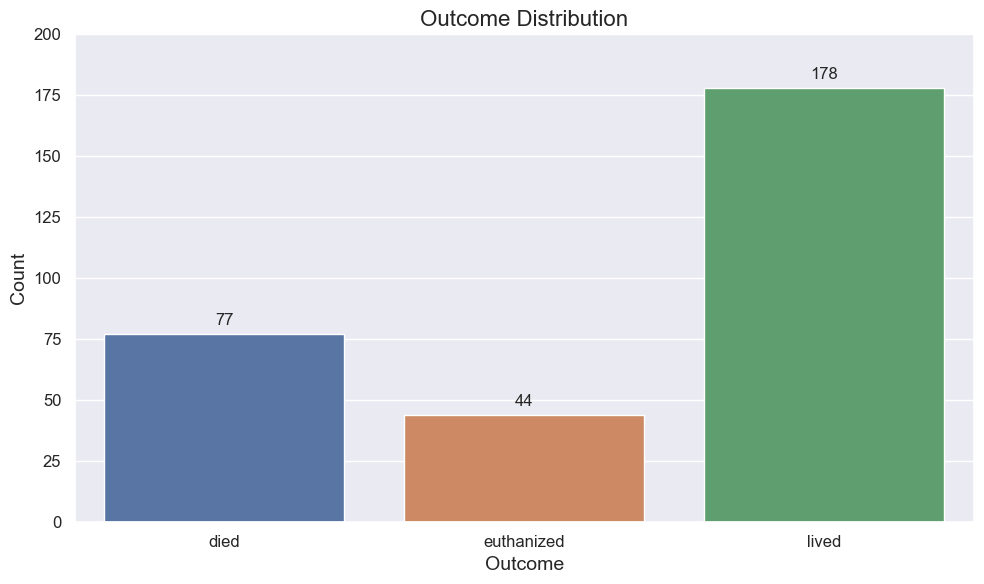

In [192]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='outcome')
# Add count labels above each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Outcome Distribution', fontsize=16)
plt.ylim(0, 200)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [193]:
print(df.outcome.value_counts())

outcome
lived         178
died           77
euthanized     44
Name: count, dtype: int64


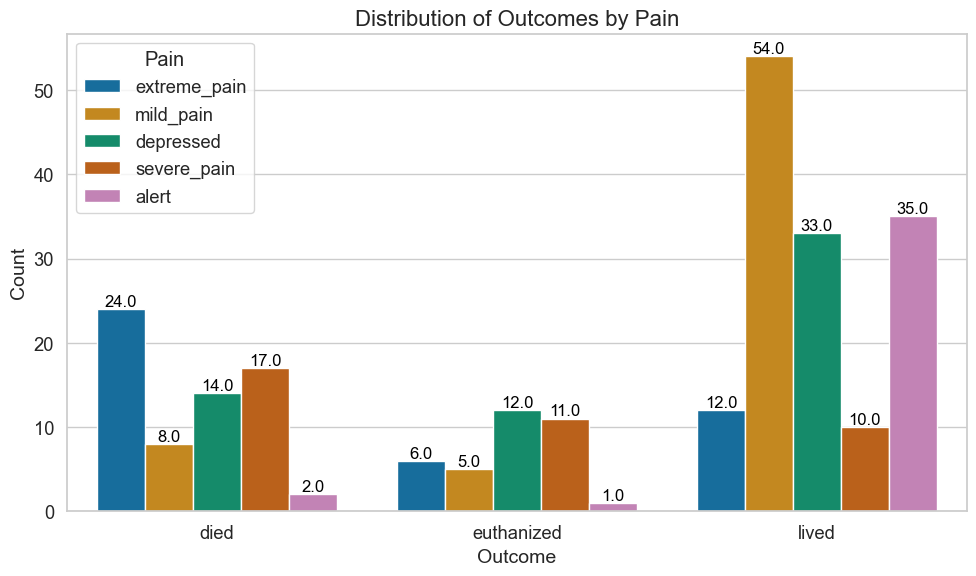

In [194]:
# Figure showing that horses exhibiting the highest symptoms of extreme pain, severe pain, and depression ultimately died.
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='outcome', hue='pain', palette='colorblind')
ax.set_xlabel('Outcome', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Outcomes by Pain', fontsize=16)
ax.legend(title='Pain', loc='upper left')
# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center',
                va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

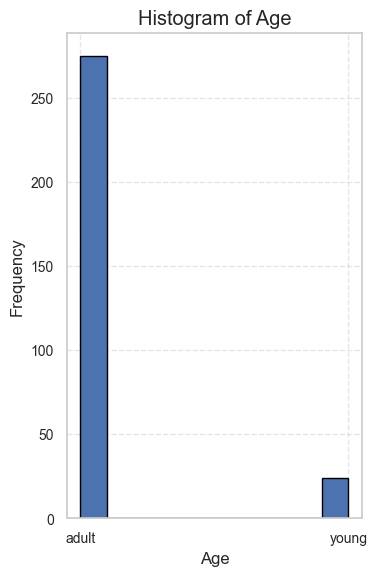

In [195]:
# Histograms of single numeric value (age of horse)
plt.figure(figsize=(4, 6))
plt.hist(df['age'], bins='auto', edgecolor='black')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Age')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

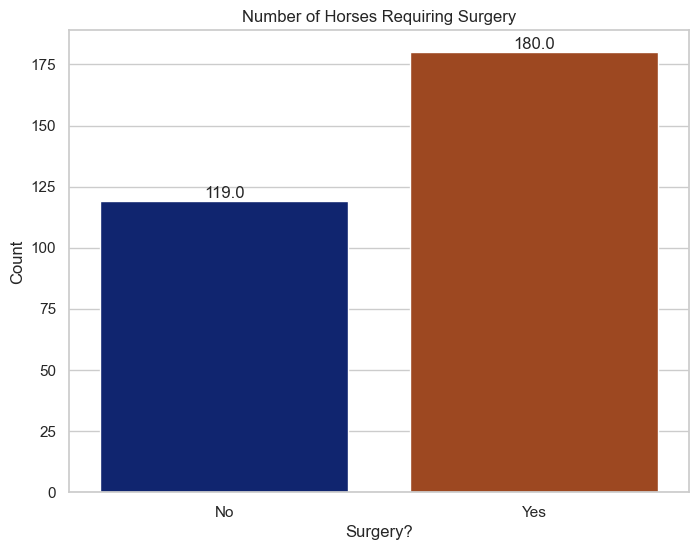

In [196]:
# Bar plots of value counts of single categorical variable (surgery)
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='surgery', data=df, palette='dark')
plt.xlabel('Surgery?')
plt.ylabel('Count')
plt.title('Number of Horses Requiring Surgery')
plt.xticks([0, 1], ['No', 'Yes'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

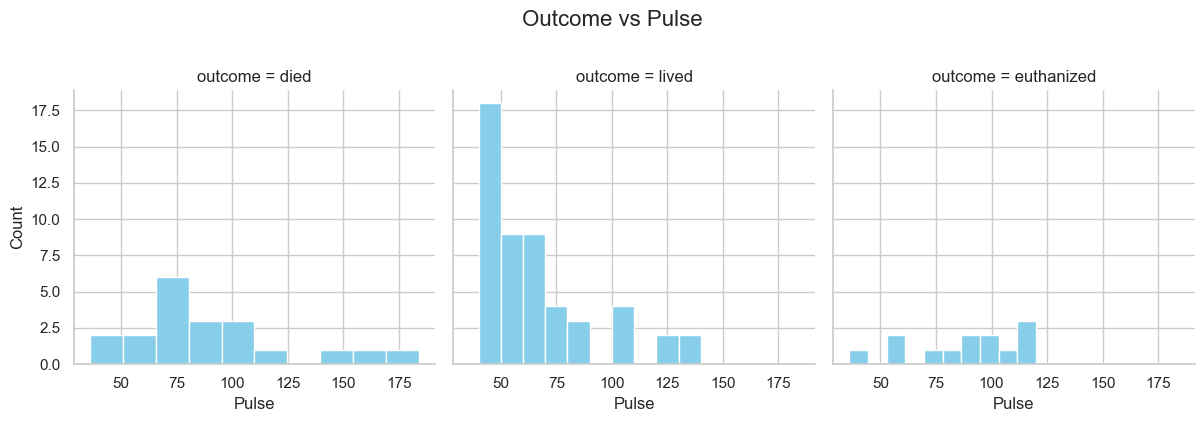

In [197]:
# Subplots indicating that horses that died had a pulse of around 70 bpm, while
# horses that lived had the highest pulse count at approximately 40 bpm.
sns.set(style="whitegrid")
facet_grid = sns.FacetGrid(data=test, col='outcome', margin_titles=True, height=4)
facet_grid .map(plt.hist, 'pulse', bins=10, color='skyblue', edgecolor='white')
plt.subplots_adjust(top=0.85)
facet_grid.fig.suptitle('Outcome vs Pulse', fontsize=16, y=1.05)
facet_grid.set_axis_labels('Pulse', 'Count')
plt.show()

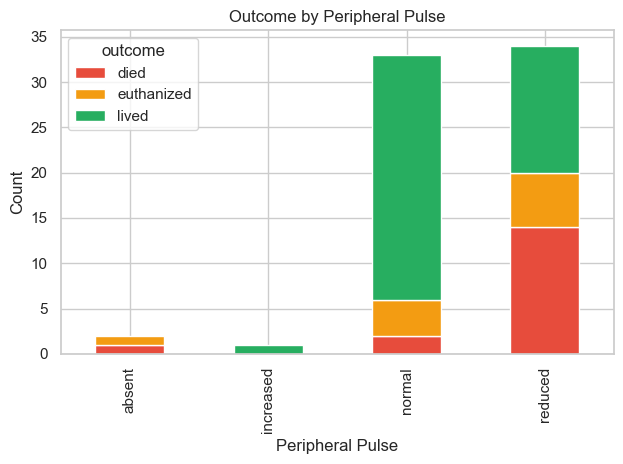

In [198]:
# Pivot table to count the occurrences of each peripheral pulse by outcome
sns.set(style="whitegrid")
pivot_table = test.pivot_table(index='peripheral_pulse', columns='outcome', aggfunc='size', fill_value=0)
# Reorder columns based on outcome categories
pivot_table = pivot_table[['died', 'euthanized', 'lived']]
ax = pivot_table.plot(kind='bar', stacked=True, color=['#E74C3C', '#F39C12', '#27AE60'])
ax.set_title('Outcome by Peripheral Pulse')
ax.set_xlabel('Peripheral Pulse')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

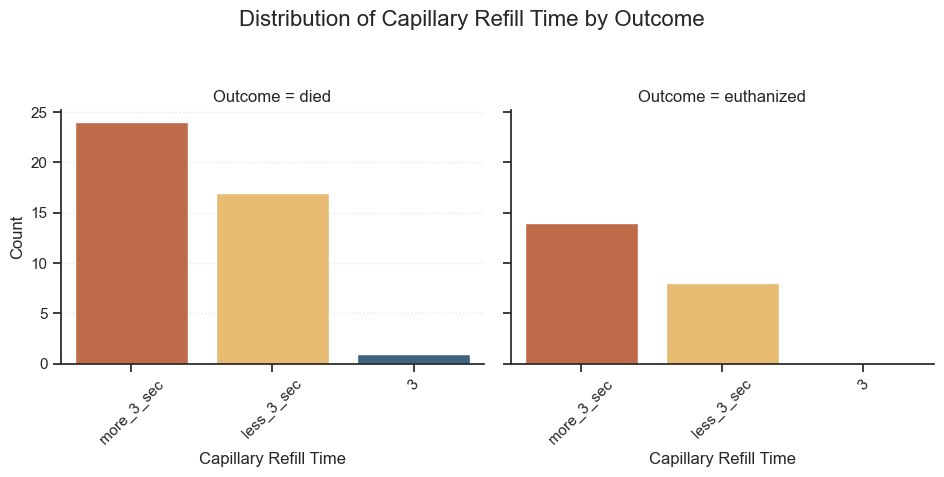

In [199]:
# Query the counts for horses that either died or were euthanized and also had
# a reduced or absent peripheral pulse, as these two values indicate 
# poor perfusion. Additionally, cross-reference this data with capillary 
# refill time, as a longer refill time suggests poorer circulation.

custom_color_palette = ['#d36135','#fac05e', '#33658a']

# Filter the DataFrame based on conditions
reduced_absent_pulse_df = df[
    (df['outcome'].isin(['died', 'euthanized'])) &
    (df['peripheral_pulse'].isin(['reduced', 'absent']))
]

sns.set_style("ticks")

capillary_refill_plot = sns.catplot(
    data=reduced_absent_pulse_df,
    x='capillary_refill_time',
    col='outcome',
    kind='count',
    palette=custom_color_palette,
    height=4,
    aspect=1.2
)

capillary_refill_plot.set_titles('Outcome = {col_name}')
capillary_refill_plot.set_xlabels('Capillary Refill Time')
capillary_refill_plot.set_ylabels('Count')
sns.despine()
capillary_refill_plot.set_xticklabels(rotation=45)
capillary_refill_plot.fig.suptitle('Distribution of Capillary Refill Time by Outcome', y=1.05, fontsize=16)
capillary_refill_plot.axes.flat[0].grid(axis='y', linestyle=':', alpha=0.5)
capillary_refill_plot.fig.subplots_adjust(top=0.8)
plt.show()

### Method Test: Random Forest
To improve the model's performance, the regular training dataset is combined with the test dataset. This will train the model on a wider range of data, enabling better generalization and evaluation of its effectiveness in various scenarios. The merged dataset facilitates a more comprehensive assessment of the model.

In [200]:
# Joining the regular dataset and the test-train dataset
train_dataset_index = df.shape[0]
test_dataset_index = test.shape[0]

merged_dataset = pd.concat(objs=[df, test], axis=0, ignore_index=True)
# Before joining
print("Train Dataset Shape: {} rows, {} columns".format(df.shape[0], df.shape[1]))
print("Test Dataset Shape: {} rows, {} columns\n".format(test.shape[0], test.shape[1]))
# After joining
print("Merged Dataset Shape: {} rows, {} columns".format(merged_dataset.shape[0], merged_dataset.shape[1]))

Train Dataset Shape: 299 rows, 24 columns
Test Dataset Shape: 89 rows, 28 columns

Merged Dataset Shape: 388 rows, 28 columns


In [201]:
# Check for missing values in each column of merged_dataset
for column in merged_dataset.columns:
    # Count the number of missing values in the current column
    missing_values_count = merged_dataset[column].isna().sum()
    
    if missing_values_count > 0:
        # Calculate the percentage of missing values in the current column
        missing_percentage = missing_values_count / len(merged_dataset)
        
        if missing_percentage > 0.5:
            # If more than 50% of values are missing, remove the column
            print(f"Column '{column}' removed")
            merged_dataset.drop(column, axis=1, inplace=True)
        elif merged_dataset[column].dtype == 'object':
            # For categorical columns, fill missing values with the mode (most frequent value)
            merged_dataset[column].fillna(merged_dataset[column].mode().iloc[0], inplace=True)
        else:
            # For numerical columns, fill missing values with the median
            merged_dataset[column].fillna(merged_dataset[column].median(), inplace=True)

# Print the shape and remaining missing values in merged_dataset
print("Shape of merged_dataset:", merged_dataset.shape)
print("Missing values in merged_dataset:")
print(merged_dataset.isna().sum())
print("\nValue counts:")
print(merged_dataset['outcome'].value_counts())

Column 'hospital_number' removed
Column 'nasogastric_reflux_ph' removed
Column 'abdomo_appearance' removed
Column 'abdomo_protein' removed
Shape of merged_dataset: (388, 24)
Missing values in merged_dataset:
surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

Value counts:
outcome
lived         231
died          100
euthanized     57
Name: count, dtype: int64


In [202]:
# Fix the "outcome" column by converting the categorial data to numeric
merged_dataset["outcome"] = merged_dataset["outcome"].astype('category').cat.codes
merged_dataset.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,extreme_pain,...,decreased,distend_large,45.0,8.4,0,no,11300,0,0,no
1,yes,adult,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,mild_pain,...,absent,other,50.0,85.0,1,no,2208,0,0,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,normal,normal,33.0,6.7,2,no,0,0,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,decreased,distend_large,48.0,7.2,0,yes,2208,0,0,yes
4,no,adult,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,mild_pain,...,absent,distend_large,74.0,7.4,0,no,4300,0,0,no


In [203]:
# Convert the rest of the categorical data to numeric using One Hot Encoding
merged_dataset = pd.get_dummies(merged_dataset)
merged_dataset.head(10)

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,outcome,lesion_1,lesion_2,lesion_3,surgery_no,...,rectal_exam_feces_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,38.5,66.0,28.0,45.0,8.4,0,11300,0,0,True,...,False,True,False,False,False,False,True,False,True,False
1,39.2,88.0,20.0,50.0,85.0,1,2208,0,0,False,...,False,False,False,False,False,True,True,False,True,False
2,38.3,40.0,24.0,33.0,6.7,2,0,0,0,True,...,True,False,False,False,True,False,True,False,False,True
3,39.1,164.0,84.0,48.0,7.2,0,2208,0,0,False,...,False,True,False,False,False,False,False,True,False,True
4,37.3,104.0,35.0,74.0,7.4,0,4300,0,0,True,...,False,True,False,False,False,False,True,False,True,False
5,38.2,64.0,28.0,45.0,7.5,2,0,0,0,True,...,False,False,False,True,False,False,True,False,True,False
6,37.9,48.0,16.0,37.0,7.0,2,3124,0,0,False,...,False,True,False,False,False,False,False,True,True,False
7,38.2,60.0,28.0,44.0,8.3,0,2208,0,0,False,...,False,False,True,False,False,False,False,True,True,False
8,38.2,80.0,36.0,38.0,6.2,1,3205,0,0,True,...,False,True,False,False,False,False,False,True,True,False
9,38.3,90.0,28.0,40.0,6.2,2,0,0,0,True,...,False,True,False,False,False,False,True,False,False,True


In [204]:
df = merged_dataset.iloc[:train_dataset_index]
test = merged_dataset.iloc[train_dataset_index:]

# Checking shape
print("Original training dataset")
print(f"Variables: {df.shape[1]}\nEntries: {df.shape[0]}\n")
print("Test dataset")
print(f"Variables: {test.shape[1]}\nEntries: {test.shape[0]}\n")

Original training dataset
Variables: 62
Entries: 299

Test dataset
Variables: 62
Entries: 89



In [205]:
# The outcome variable needs to be removed in order to train the model effectively
X_train = df.drop("outcome", axis=1).values
Y_train = df["outcome"]
X_test  = test.drop("outcome", axis=1).values
Y_test  = test["outcome"]

In [206]:
# Random Forest
num_estimators = 150
random_forest = RandomForestClassifier(n_estimators=num_estimators, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
random_forest.fit(X_train, Y_train)

# Calculate and print the training accuracy
train_accuracy = round(random_forest.score(X_train, Y_train) * 100, 2)
print(f'\nTraining Accuracy: {train_accuracy}%')
# Calculate and print the test accuracy
test_accuracy = round(random_forest.score(X_test, Y_test) * 100, 2)
print(f'Test Accuracy: {test_accuracy}%')
Y_pred = random_forest.predict(X_test)
# Calculate and print the confusion matrix
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=["Real"], colnames=["Predict"], margins=True)
# Format the confusion matrix output
confusion_matrix_formatted = confusion_matrix.copy()
confusion_matrix_formatted.index = ['Actual ' + str(label) for label in confusion_matrix.index]
confusion_matrix_formatted.columns = ['Predicted ' + str(label) for label in confusion_matrix.columns]
# Print the formatted confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix_formatted)


Training Accuracy: 94.65%
Test Accuracy: 95.51%

Confusion Matrix:
            Predicted 0  Predicted 1  Predicted 2  Predicted All
Actual 0             22            0            1             23
Actual 1              1           10            2             13
Actual 2              0            0           53             53
Actual All           23           10           56             89


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       1.00      0.77      0.87        13
           2       0.95      1.00      0.97        53

    accuracy                           0.96        89
   macro avg       0.97      0.91      0.93        89
weighted avg       0.96      0.96      0.95        89



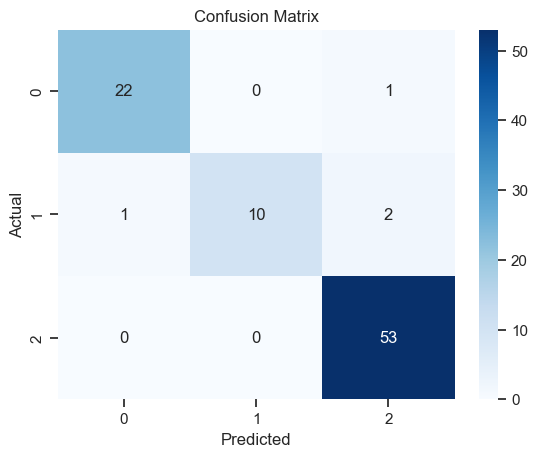

In [207]:
# Generate a classification report based on the predicted labels (Y_pred) 
# and the true labels (Y_test).  
report = classification_report(Y_test, Y_pred)
print(report)
# Display the number of true positives, true negatives, false positives, 
# and false negatives for each class.
confusion_matrix = pd.crosstab(Y_test, Y_pred)
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()